In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/housing.csv")

In [5]:
df['income_cat']  = pd.cut(df['median_income'], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

In [6]:
split = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2)
for train_index, test_index in split.split(df, df['income_cat']):
    strata_train_set = df.loc[train_index]
    strata_test_set = df.loc[test_index]

In [9]:
for sett in (strata_train_set, strata_test_set):
    sett.drop('income_cat', axis=1, inplace=True)

In [10]:
strata_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [12]:
df = strata_train_set.copy()

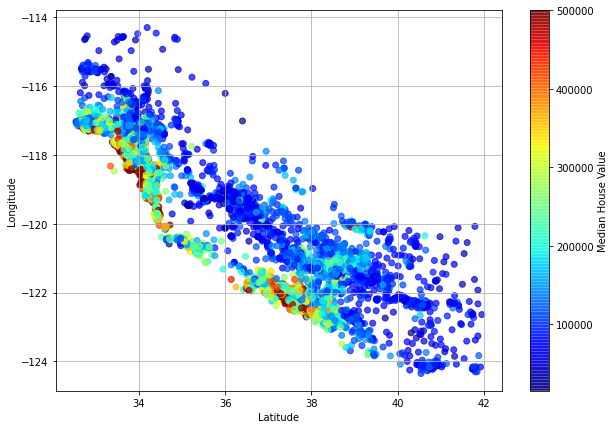

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(x= df['latitude'], y=df['longitude'],alpha=0.7, c=df['median_house_value'], cmap='jet')
plt.grid(True)
plt.colorbar(label='Median House Value')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('')
plt.show()

In [34]:
# import seaborn as sns
# plt.figure(figsize=(10, 7))
# sns.scatterplot()
# # 

In [35]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [36]:
from pandas.plotting import scatter_matrix

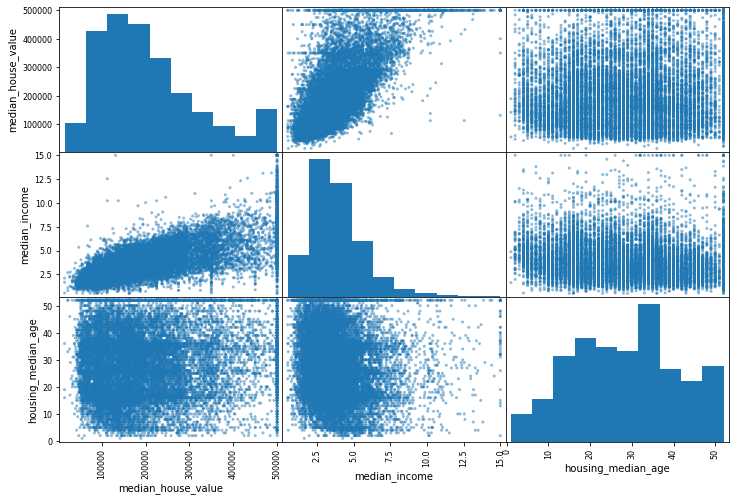

In [40]:
attributes = ["median_house_value", "median_income","housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

<Figure size 864x576 with 0 Axes>

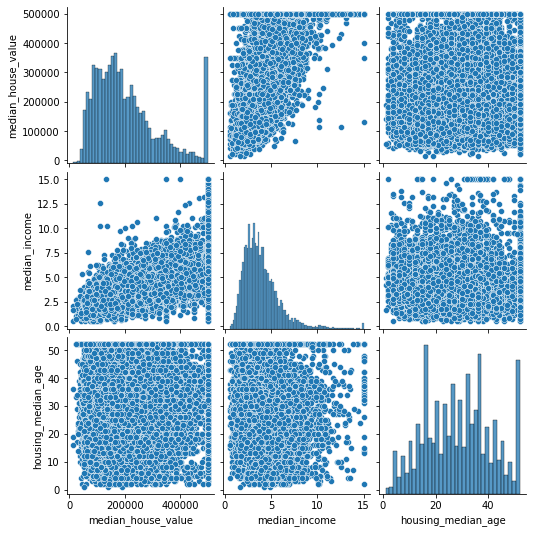

In [45]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[attributes])
plt.show()